In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import os
os.chdir("/content/gdrive/My Drive/112_2_LATIA/week4_0312/") # 切換目錄
import pandas as pd

csv_file = './std_each_week_study_tf.csv'
df = pd.read_csv(csv_file) # 讀取csv檔案
print(df.head(), '\n')

Mounted at /content/gdrive/
                  時間戳記 1. 性別 2. 年級 3. 系級(範例：科技系116)  4. 這學期學分數(請輸入數字，單位為學分)  \
0  2024/3/5 下午 1:11:18     女    大一           企管系116                      20   
1  2024/3/5 下午 1:20:51     男    大一          學習科學116                      23   
2  2024/3/5 下午 1:26:00     男    大二           機電系115                      22   
3  2024/3/5 下午 1:30:19     男    大二           機電系115                      22   
4  2024/3/5 下午 1:31:21     男    大二           機電系115                      22   

  5. 每天使用3C時間多寡，以小時計(是指看影片、社群、打Game等等) 6. 是否單身(是指是否有沒有男女朋友) 7. 是否打工 8. 是否參加社團  \
0                                3-5小時                    是       否         否   
1                               5-10小時                    是       否         否   
2                                3-5小時                    否       否         否   
3                                3-5小時                    是       否         否   
4                               5-10小時                    是       是         否   

  9. 經濟能力 

In [ ]:
# Assume df is your pandas DataFrame and it has columns '2. 年級' and '5. 每天使用3C時間多寡，以小時計(是指看影片、社群、打Game等等)'
# df = pd.DataFrame({'2. 年級': [...], '5. 每天使用3C時間多寡，以小時計(是指看影片、社群、打Game等等)': [...]})

# Count the combinations of '2. 年級' and '5. 每天使用3C時間多寡，以小時計(是指看影片、社群、打Game等等)'
combination_counts = df.groupby(['2. 年級', '5. 每天使用3C時間多寡，以小時計(是指看影片、社群、打Game等等)']).size().unstack(fill_value=0)

# If you want to flatten this and have a multi-index series
flat_counts = df.groupby(['2. 年級', '5. 每天使用3C時間多寡，以小時計(是指看影片、社群、打Game等等)']).size()

# To print the counts
print(combination_counts)
#print(flat_counts)
# Create a new column that concatenates the values from '2. 年級' and '5. 每天使用3C時間多寡，以小時計(是指看影片、社群、打Game等等)'
df['xy_combination'] = df['5. 每天使用3C時間多寡，以小時計(是指看影片、社群、打Game等等)'] + df['2. 年級']

# Get the counts for each combination
xy_combination_counts = df['xy_combination'].value_counts().sort_index()

# Print the combination counts
#print(xy_combination_counts)

5. 每天使用3C時間多寡，以小時計(是指看影片、社群、打Game等等)  10小時以上  3-5小時  5-10小時  低於3小時
2. 年級                                                             
大一                                         0      2       5      0
大三                                         2      4       4      1
大二                                         0      9       4      0
大四                                         0      5       5      1


In [ ]:
df02=df[['2. 年級','5. 每天使用3C時間多寡，以小時計(是指看影片、社群、打Game等等)']]
grade_acc=['大一','大二','大三','大四']
time_acc=['3-5小時','5-10小時','5-10小時','10小時以上']

In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-03-15 05:51:32--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.148.100, 142.250.148.139, 142.250.148.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.148.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-03-15 05:51:32--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.111.132, 2607:f8b0:4001:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.111.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  58.2MB/s    in 0.3s    

2024-03-15 

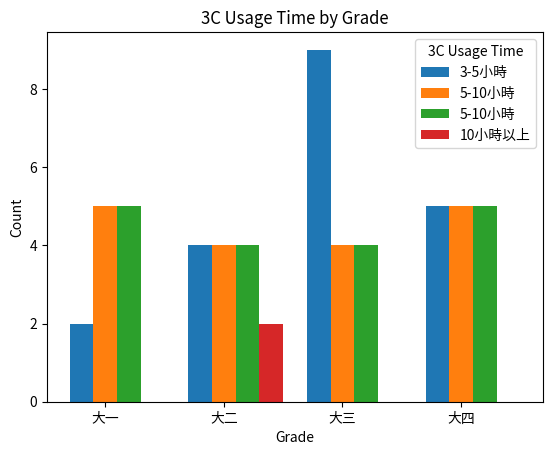

In [ ]:
#年級
import matplotlib.pyplot as plt

grouped = df.groupby(['2. 年級', '5. 每天使用3C時間多寡，以小時計(是指看影片、社群、打Game等等)']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
fig, ax = plt.subplots()

# Create a bar for each time category
bar_width = 0.2  # Set the width of each bar
indices = np.arange(len(grade_acc))

for i, time in enumerate(time_acc):
    ax.bar(indices + i * bar_width, grouped[time], width=bar_width, label=time)

# Set the xticks to be in the middle of the groups
ax.set_xticks(indices + bar_width)
ax.set_xticklabels(grade_acc)

# Adding labels and title
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('3C Usage Time by Grade')


# Show the plot
plt.show()


In [ ]:
grouped

5. 每天使用3C時間多寡，以小時計(是指看影片、社群、打Game等等),10小時以上,3-5小時,5-10小時,低於3小時
2. 年級,,,,
大一,0,2,5,0
大三,2,4,4,1
大二,0,9,4,0
大四,0,5,5,1


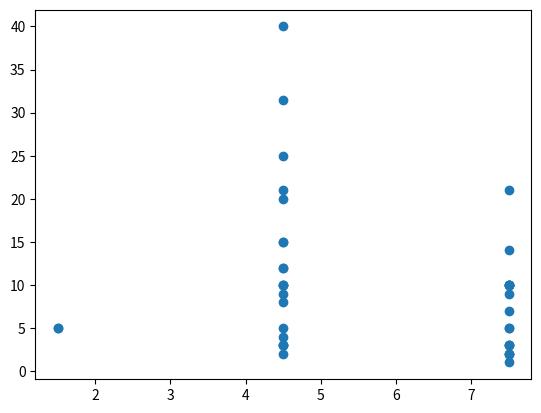

In [ ]:


"""Asumming that :低於3小時=1.5小時
                3-5小時=4.5小時
                5-10小時=7.5小時"""
age_kvp={'大一':19,'大二':20,'大三':21,'大四':22}
time_kvp={'低於3小時':1.5,'3-5小時':4.5,'5-10小時':7.5}
#df['2. 年級'].map(age_kvp)
x2=np.array(df['5. 每天使用3C時間多寡，以小時計(是指看影片、社群、打Game等等)'].map(time_kvp))
y=np.array(df['13. 每周總讀書時間(請輸入數字，單位為小時)'])
plt.scatter(x2,y)

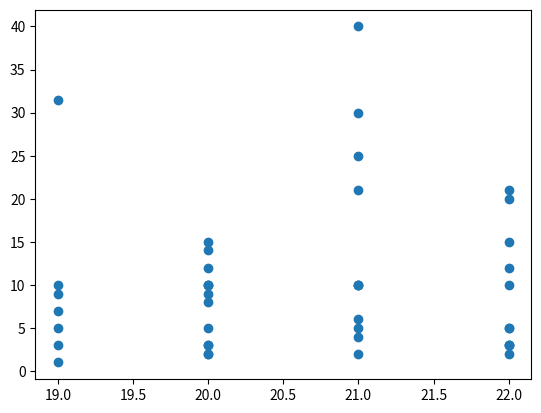

In [ ]:
"""Asumming that :大一=19歲
                大二=20歲
                大三=21歲
                大四=22歲"""

"""Asumming that :低於3小時=1.5小時
                3-5小時=4.5小時
                5-10小時=7.5小時"""
age_kvp={'大一':19,'大二':20,'大三':21,'大四':22}
time_kvp={'低於3小時':1.5,'3-5小時':4.5,'5-10小時':7.5}
x1=np.array(df['2. 年級'].map(age_kvp))
#x2=np.array(df['5. 每天使用3C時間多寡，以小時計(是指看影片、社群、打Game等等)'].map(time_kvp))
y=np.array(df['13. 每周總讀書時間(請輸入數字，單位為小時)'])
plt.scatter(x1,y)